In [3]:
import dgl

In [4]:
g = dgl.DGLGraph()

In [13]:
??g.nodes

In [15]:
??dgl.data.citation_graph

In [17]:
dgl.__version__

'0.1.3'

In [18]:
!pwd

/media/backup/segun


In [19]:
import networkx as nx

In [118]:
fh=open("patent_gr/pg1594", 'rb')
G=nx.read_edgelist(fh)
fh.close()


In [84]:
G = G.to_directed()

In [78]:
u, v = zip(*H.edges)

In [57]:
len(u), len(v)

(1337, 1337)

In [66]:
int(u[-1].replace('bn:','')[:-1])

14648460

In [91]:
def mapping(x):
  return int(x.replace('bn:','')[:-1])
H=nx.relabel_nodes(G,mapping)
print(H.nodes())

[44916, 3341, 21483, 28018, 5095, 21475, 11744, 57341, 102277, 488, 77270, 35370, 1296, 53823, 77386, 59458, 36845, 102258, 17027, 13389, 32600, 51621, 52341, 51032, 49083, 43383, 75762, 19439, 21538, 1187943, 3473, 20, 61135, 16413, 75, 6125, 20452, 61450, 52501, 836, 18875, 61855, 63445, 68991, 47411, 902, 31085, 18111, 30440, 27546, 64855, 41249, 2222, 21676, 66247, 3256513, 33729, 37008, 48242, 46844, 702242, 6835, 6843, 6848, 1172, 64167, 76843, 17163, 11389, 17184, 21159, 3643193, 18590, 75123, 70190, 30922, 21551, 3268, 99422, 17761, 6382, 108069, 18895, 55734, 55052, 1545108, 93049, 87538, 114778, 56195, 80386, 44911, 3310106, 914927, 24373, 45321, 52497, 228224, 83184, 90399, 51508, 65288, 87054, 13077, 82573, 70574, 104196, 104162, 45409, 104434, 21961, 87671, 26512, 86612, 13670, 61133, 61017, 75683, 2593692, 103782, 14522806, 23236, 27529, 4274, 89660, 85499, 83187, 3437242, 3397023, 3140056, 3269906, 31025, 21476, 48868, 101290, 81753, 84554, 75719, 114150, 50828, 98649, 1

In [86]:
G, H

(<networkx.classes.digraph.DiGraph at 0x7fa440d15320>,
 <networkx.classes.digraph.DiGraph at 0x7fa440d15a90>)

In [87]:
H.number_of_nodes()

202

In [119]:
G = nx.convert_node_labels_to_integers(G) #ordering='sorted', default

In [117]:
??nx.convert_node_labels_to_integers

In [121]:
G.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 0), (0, 154), (1, 30), (1, 35), (1, 40), (1, 47), (1, 61), (1, 75), (1, 72), (1, 18), (1, 41), (1, 122), (1, 50), (1, 116), (1, 90), (1, 38), (1, 57), (1, 82), (1, 139), (1, 143), (1, 147), (1, 142), (1, 32), (1, 29), (1, 103), (1, 62), (1, 37), (1, 10), (1, 20), (1, 172), (1, 43), (1, 49), (1, 13), (1, 63), (1, 59), (1, 152), (1, 160), (1, 76), (1, 121), (1, 1), (1, 173), (1, 77), (1, 36), (1, 146), (1, 25), (1, 97), (1, 24), (1, 34), (1, 31), (1, 154), (1, 28), (1, 46), (1, 60), (1, 67), (1, 45), (1, 196), (1, 12), (1, 21), (1, 5), (1, 70), (2, 105), (2, 120), (2, 132), (2, 33), (2, 133), (2, 3), (2, 4), (2, 5), (2, 152), (2, 188), (2, 30), (2, 6), (2, 38), (2, 54), (2, 36), (2, 7), (2, 29), (2, 2), (2, 196), (2, 12), (3, 30), (3, 132), (3, 147), (3, 33), (3, 13), (3, 36), (3, 10), (3, 121), (3, 152), (3, 154), (3, 4), (3, 29), (3, 5), (3, 3), (3, 184), (3, 150), (3, 20), (4, 186), (4, 10), (4, 5), (4, 4), (5, 132), (5, 33), (5, 1

In [105]:
g.from_networkx(G)

In [80]:
??nx.digraph

In [129]:
len(g.nodes())

202

In [131]:
!pwd

/media/backup/segun


In [134]:
import os
path='./patent_gr'
files = os.listdir(path)

In [137]:
int(files[0].replace('pg',''))

2254

In [148]:
import pandas as pd
tr_df = pd.read_csv('./pat/train_set.csv', delimiter=',', header=None)


In [176]:
lab = tr_df.loc[tr_df[0] == int(files[0].replace('pg',''))][1].values[0]

In [178]:
len(lab)

0

In [307]:
from dgl import DGLGraph
class GrDataset(object):
    
    def __init__(self, fromFolder=None):
        super(GrDataset, self).__init__()
        self.fromFolder = fromFolder
        self.graphs = []
        self.labels = []
        self.num_classes = 0
        self.path = fromFolder
        self._create()
    
    def __len__(self):
        pass
    def __getitem__(self, idx):
        return self.graphs[idx], self.labels[idx]
    def _create(self):
        import os
        path = self.fromFolder
        files = os.listdir(path)
        for f in files:
            fh = open(path+'/'+f, 'rb')
            G = nx.read_edgelist(fh)
            fh.close()
#             G = G.to_directed()
            G = nx.convert_node_labels_to_integers(G, ordering='sorted')
            G = DGLGraph(G)
            nodes = G.nodes()
            G.add_edges(nodes, nodes)
            self.graphs.append(G)
            lab = tr_df.loc[tr_df[0] == int(files[0].replace('pg',''))][1].values[0]
            self.labels.append(lab)
        
        u_lab = np.unique(self.labels)
        print(u_lab)
        self.num_classes = len(u_lab)
#         l2idx = {k:v for v, k in enumerate(u_lab)}
# #         print(len(l2idx))
#         self.labels = [l2idx[l] for l in self.labels]   

In [308]:
dataset = GrDataset('./patent_gr')

['G']


In [309]:
len(dataset.labels)

900

In [291]:
np.unique(dataset.labels)

array([0])

In [310]:
g, l = dataset[510]

In [313]:
len(g.edges()[0])

1387

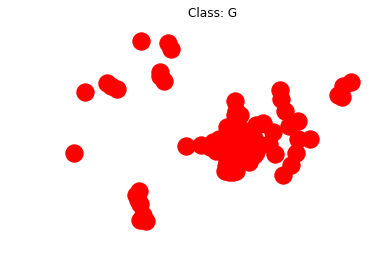

In [312]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
nx.draw(g.to_networkx(), ax=ax)
ax.set_title('Class: {}'.format(l))
# plt.savefig("graph.png", dpi=1000)
plt.show()

In [271]:
#collate fn
def collate(samples):
    gs, labs = map(list, zip(*samples))
    batch_gr = dgl.batch(gs)
    return batch_gr, torch.tensor(labs)

In [274]:
#conv. layer
import dgl.function as fn
import torch.nn as nn
import torch

msg = fn.copy_src(src='h', out='m')

def reduce(nodes):
    acc = torch.mean(nodes.mailbox['m'], 1)
    return {'h': acc}

class NodeApplyModule(nn.Module):
    def __init__(self, in_feats, out_feats, activation):
        super(NodeApplyModule, self).__init__()
        self.linear = nn.linear(in_feats, out_feats)
        self.activation = activation
        
    def forward(self, node):
        h = self.linear(node.data['h'])
        h = self.activation(h)
        return {'h': h}
    
class GCN(nn.Module):
    def __init__(self, in_feats, out_feats, activation):
        super(GCN, self).__init__()
        self.apply_mod = NodeApplyModule(in_feats, out_feats, activation)
        
    def forward(self, g, feature):
        g.ndata['h'] = feature
        g.update_all(msg, reduce)
        g.apply_nodes(func=self.apply_mod)
        return g.ndata.pop('h')
        

In [275]:
#classifier
import torch.nn.functional as F

class classifier(nn.Module):
    def __init__(self, in_dim, hidden_dim, n_class):
        super(classifier, self).__init__()
        self.layers = nn.ModuleList([GCN(in_dim, hidden_dim, F.relu), GCN(hidden_dim, hidden_dim, F.relu)])
        self.classify = nn.Linear(hidden_dim, n_class)
    
    def forward(self, g):
        h = g.in_degrees().view(-1,1).float()
        for conv in self.layers:
            h = conv(g, h)
        g.ndata['h'] = h
        hg = dgl.mean_nodes(g, 'h')
        return self.classify(hg)

In [ ]:
#training loop


In [245]:
"""A mini synthetic dataset for graph classification benchmark."""
import math
import networkx as nx
import numpy as np

from dgl import DGLGraph

__all__ = ['MiniGCDataset']


class MiniGCDataset(object):
    """The dataset class.

    The datset contains 8 different types of graphs.

    * class 0 : cycle graph
    * class 1 : star graph
    * class 2 : wheel graph
    * class 3 : lollipop graph
    * class 4 : hypercube graph
    * class 5 : grid graph
    * class 6 : clique graph
    * class 7 : circular ladder graph

    .. note::
        This dataset class is compatible with pytorch's :class:`Dataset` class.

    Parameters
    ----------
    num_graphs: int
        Number of graphs in this dataset.
    min_num_v: int
        Minimum number of nodes for graphs
    max_num_v: int
        Maximum number of nodes for graphs
    """
    def __init__(self, num_graphs, min_num_v, max_num_v):
        super(MiniGCDataset, self).__init__()
        self.num_graphs = num_graphs
        self.min_num_v = min_num_v
        self.max_num_v = max_num_v
        self.graphs = []
        self.labels = []
        self._generate()

    def __len__(self):
        """Return the number of graphs in the dataset."""
        return len(self.graphs)

    def __getitem__(self, idx):
        """Get the i^th sample.

        Paramters
        ---------
        idx : int
            The sample index.

        Returns
        -------
        (dgl.DGLGraph, int)
            The graph and its label.
        """
        return self.graphs[idx], self.labels[idx]


    @property
    def num_classes(self):
        """Number of classes."""
        return 8

    def _generate(self):
        self._gen_cycle(self.num_graphs // 8)
        self._gen_star(self.num_graphs // 8)
        self._gen_wheel(self.num_graphs // 8)
        self._gen_lollipop(self.num_graphs // 8)
        self._gen_hypercube(self.num_graphs // 8)
        self._gen_grid(self.num_graphs // 8)
        self._gen_clique(self.num_graphs // 8)
        self._gen_circular_ladder(self.num_graphs - len(self.graphs))
        # preprocess
        for i in range(self.num_graphs):
            self.graphs[i] = DGLGraph(self.graphs[i])
            # add self edges
            nodes = self.graphs[i].nodes()
            self.graphs[i].add_edges(nodes, nodes)

    def _gen_cycle(self, n):
        for _ in range(n):
            num_v = np.random.randint(self.min_num_v, self.max_num_v)
            g = nx.cycle_graph(num_v)
            self.graphs.append(g)
            self.labels.append(0)

    def _gen_star(self, n):
        for _ in range(n):
            num_v = np.random.randint(self.min_num_v, self.max_num_v)
            # nx.star_graph(N) gives a star graph with N+1 nodes
            g = nx.star_graph(num_v - 1)
            self.graphs.append(g)
            self.labels.append(1)

    def _gen_wheel(self, n):
        for _ in range(n):
            num_v = np.random.randint(self.min_num_v, self.max_num_v)
            g = nx.wheel_graph(num_v)
            self.graphs.append(g)
            self.labels.append(2)

    def _gen_lollipop(self, n):
        for _ in range(n):
            num_v = np.random.randint(self.min_num_v, self.max_num_v)
            path_len = np.random.randint(2, num_v // 2)
            g = nx.lollipop_graph(m=num_v - path_len, n=path_len)
            self.graphs.append(g)
            self.labels.append(3)

    def _gen_hypercube(self, n):
        for _ in range(n):
            num_v = np.random.randint(self.min_num_v, self.max_num_v)
            g = nx.hypercube_graph(int(math.log(num_v, 2)))
            g = nx.convert_node_labels_to_integers(g)
            self.graphs.append(g)
            self.labels.append(4)

    def _gen_grid(self, n):
        for _ in range(n):
            num_v = np.random.randint(self.min_num_v, self.max_num_v)
            assert num_v >= 4, 'We require a grid graph to contain at least two ' \
                                   'rows and two columns, thus 4 nodes, got {:d} ' \
                                   'nodes'.format(num_v)
            n_rows = np.random.randint(2, num_v // 2)
            n_cols = num_v // n_rows
            g = nx.grid_graph([n_rows, n_cols])
            g = nx.convert_node_labels_to_integers(g)
            self.graphs.append(g)
            self.labels.append(5)

    def _gen_clique(self, n):
        for _ in range(n):
            num_v = np.random.randint(self.min_num_v, self.max_num_v)
            g = nx.complete_graph(num_v)
            self.graphs.append(g)
            self.labels.append(6)

    def _gen_circular_ladder(self, n):
        for _ in range(n):
            num_v = np.random.randint(self.min_num_v, self.max_num_v)
            g = nx.circular_ladder_graph(num_v)
            self.graphs.append(g)
            self.labels.append(7)

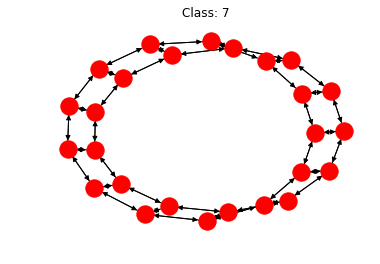

In [249]:
import matplotlib.pyplot as plt
import networkx as nx
# A dataset with 80 samples, each graph is
# of size [10, 20]
dataset = MiniGCDataset(80, 10, 20)
graph, label = dataset[79]
fig, ax = plt.subplots()
nx.draw(graph.to_networkx(), ax=ax)
ax.set_title('Class: {:d}'.format(label))
plt.show()

In [251]:
graph